 #### Date : 29-SEP-2019

# Case Study

## Logistic Regression

    - Supervised classification technique
    - Target variable is categorical ( Y / N, CANCER / NOT CANCER)
    - Sigmoid / Logit transformation
    
    - Odds ? 
        odds of my team wining is 4 to 1
        i.e my team wins 4 times and looses 1 time
        which is also written as 4/1
        
        probability of wining p = 4/5
        probability of not wining p = 1/5
        
        odds = p / (1-p)  given p as probability of success
             = probability of success / probability of failiure
             = (4/5)/(1/5)
             = 4/1

##### ** we have to follow and watch statquest by josh starmer


### Confusion matrix

    SUBSCRIPTION
    0 - dosent subscribe (-ve)
    1- subscribes        (+ve)
    
       ACTUAL PREDICTED                                     Actual
FP        0     1                                     |  +     |    -
TP        1     1                                 ----|--------|----------
TN        0     0                                  +  | TP(3)  |   FP(3)
FP        0     1                       Predicted ----|--------|----------
TP        1     1                                  -  | FN(1)  |   TN(3)
TN        0     0                                 ----|--------|---------- 
TP        1     1                                    
TN        0     0                                  
FP        0     1                                  
FN        1     0
  
      TP = ACTUAL(1) , PREDICTED (1)
      FP = ACTUAL(0) , PREDICTED (1)
      TN = ACTUAL(0) , PREDICTED (0)
      FN = ACTUAL(1) , PREDICTED (0)
  
    ACCURACY  = (TP+TN)/(TP+TN+FP+FN)  
              = 6/10 = 0.60 = 60%
              
    PRECISION = TP/(TP+FP) out of the total actuls how many positives were correctly predicted
              = 3/6 = 0.50 = 50%
              
    RECALL    = TP/(TP+FN) out of the total predictions made how many were actually correct
    
    ALSO CALL SENSITIVITY
              = 3/4 = 0.75 = 75%
    
    SPECIFICITY = TN/(TN+FP) is out of total predicted how many negatives were actually correct
                = 3/6 = 0.5 = 50%
    
    

# ROC Curve (Receiver Operative Charateristics)

### AUC (Area under Curve)
    

 to read books introduction to statistical learning
             elements of statistical learning
             robert tibshirani 
             hands on machine learning with sakit learn and tensorflow
 

In [85]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from scipy import stats
from scipy.stats import skew
from scipy.stats import mode
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Case Study for logistic regression

# Car Insurance



In [86]:
# read in test and train datasets

Insurance_data = pd.read_csv('C:/Users/Smart User/Downloads/carInsurance_train.csv')
Insurance_test = pd.read_csv('C:/Users/Smart User/Downloads/carInsurance_test.csv')

In [87]:
Insurance_data.shape

(4000, 19)

In [88]:
Insurance_test.shape

(1000, 19)

In [89]:
Insurance_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [90]:
Insurance_data.tail()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0
3999,4000,45,services,married,primary,0,137,1,0,NaN,9,may,2,-1,0,NaN,13:31:48,13:36:22,0


In [91]:
# check the column datatype
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 593.8+ KB


In [92]:
# Check the summary of data
Insurance_data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [93]:
Insurance_data.describe(include=np.object)

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,13:54:34,10:52:24
freq,893,2304,1988,2831,1049,437,3,3


C:\Users\Smart User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Smart User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


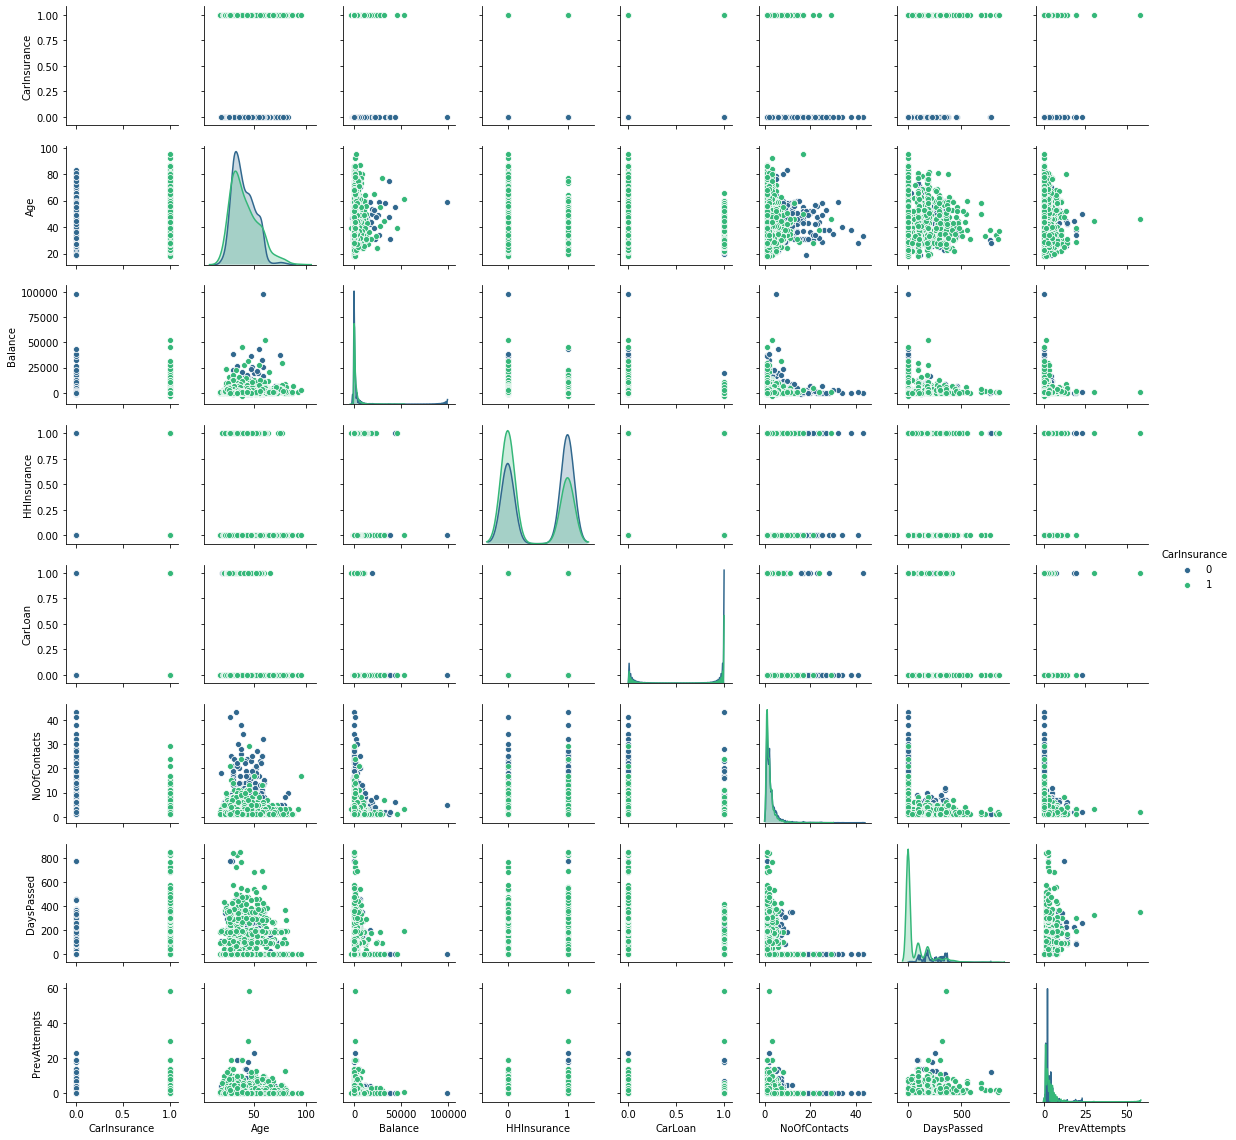

In [94]:
# pair plot for HHinsurance, carInsurance, Age, Balance, Carloan, number of contacts, Days passed, Prev attempts
impt_feats = ['CarInsurance','Age','Balance','HHInsurance','CarLoan','NoOfContacts','DaysPassed','PrevAttempts']
sns.pairplot(Insurance_data[impt_feats],hue='CarInsurance',palette='viridis',height=2)
plt.show()

1. Seniors are more likely to buy the insurance
2. balance has an outlier
3. hhinsurance having persons are less likely to buy carinsurance
4. carloan : less likely to buy carinsurance
5. no of contacts : more ontacts cause more attention
6. Days passed : more days passed more likely to buy carinsurance
7. prev attempts : outlier , more the previous attempts hight the liklihood of buying insurance

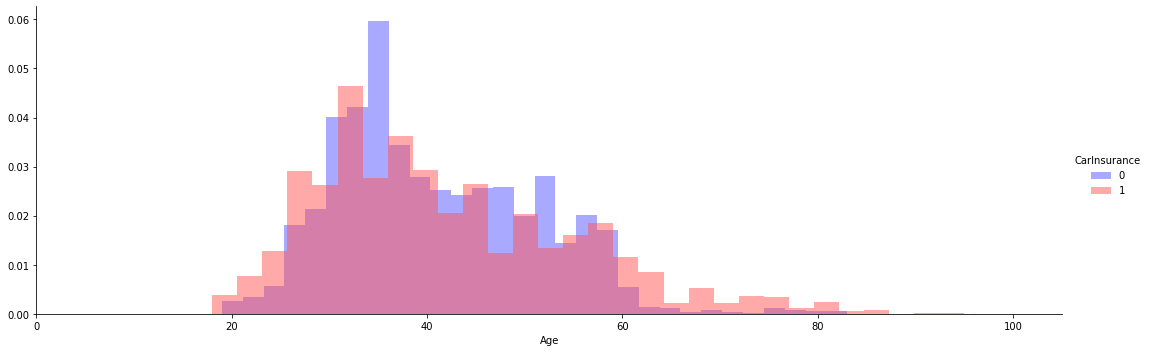

In [95]:
# lets take a closer look at the age variable

facet = sns.FacetGrid(Insurance_data, hue='CarInsurance', height=5 , aspect = 3 , palette='seismic')
facet.map(plt.hist,'Age',bins=30,alpha=0.5,density=True)
facet.set(xlim=(0,Insurance_data.Age.max()+10))
facet.add_legend()

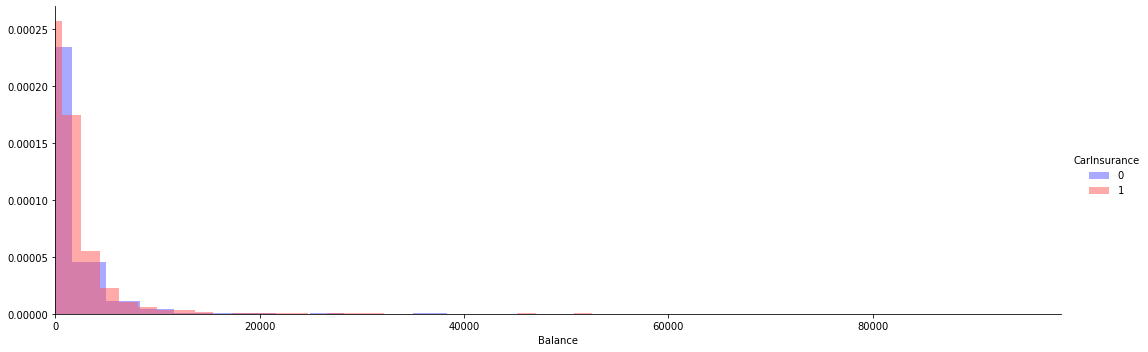

In [96]:
# lets take a closer look at the Balance variable

facet = sns.FacetGrid(Insurance_data, hue='CarInsurance', height=5 , aspect = 3 , palette='seismic')
facet.map(plt.hist,'Balance',bins=30,alpha=0.5,density=True)
facet.set(xlim=(0,Insurance_data.Balance.max()+10))
facet.add_legend()

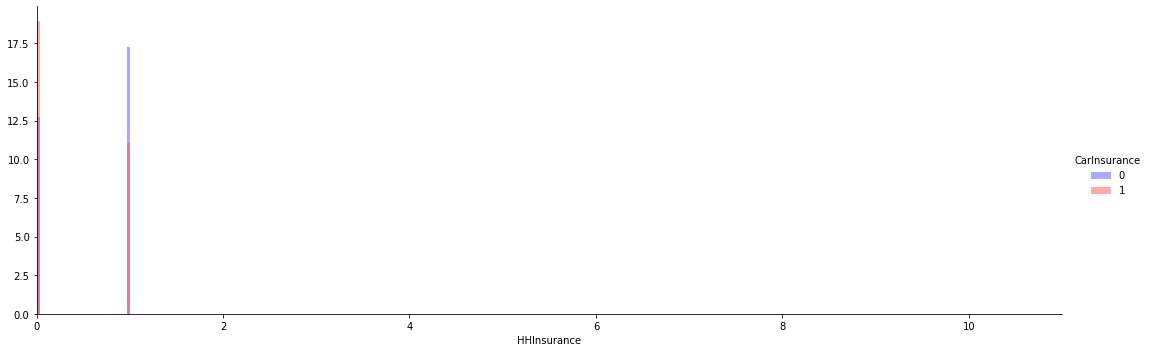

In [97]:
# lets take a closer look at the HHInsurance variable

facet = sns.FacetGrid(Insurance_data, hue='CarInsurance', height=5 , aspect = 3 , palette='seismic')
facet.map(plt.hist,'HHInsurance',bins=30,alpha=0.5,density=True)
facet.set(xlim=(0,Insurance_data.HHInsurance.max()+10))
facet.add_legend()

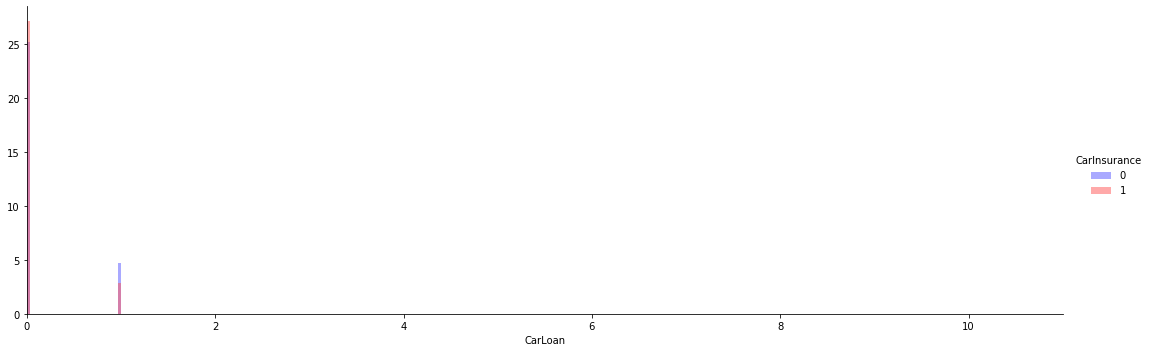

In [98]:
# lets take a closer look at the CarLoan variable

facet = sns.FacetGrid(Insurance_data, hue='CarInsurance', height=5 , aspect = 3 , palette='seismic')
facet.map(plt.hist,'CarLoan',bins=30,alpha=0.5,density=True)
facet.set(xlim=(0,Insurance_data.CarLoan.max()+10))
facet.add_legend()

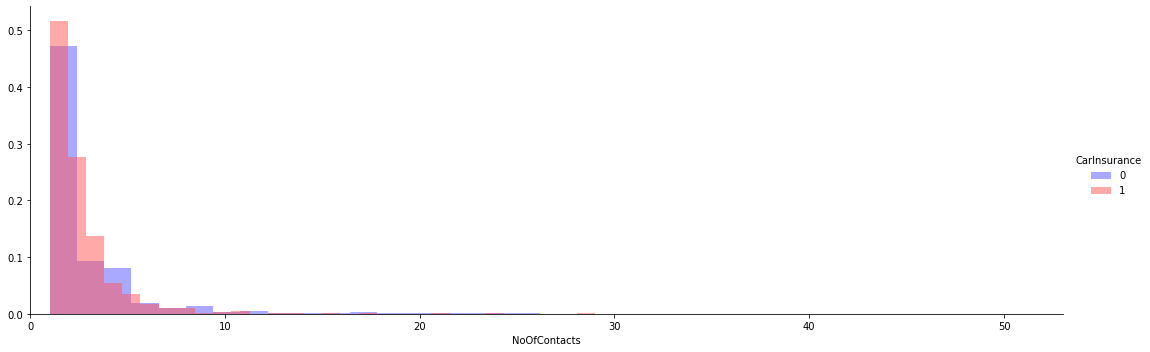

In [99]:
# lets take a closer look at the NoOfContacts variable

facet = sns.FacetGrid(Insurance_data, hue='CarInsurance', height=5 , aspect = 3 , palette='seismic')
facet.map(plt.hist,'NoOfContacts',bins=30,alpha=0.5,density=True)
facet.set(xlim=(0,Insurance_data.NoOfContacts.max()+10))
facet.add_legend()

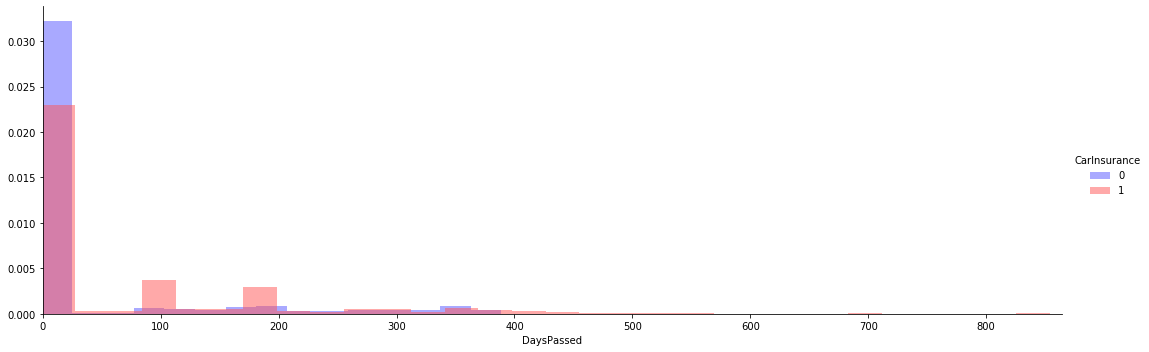

In [100]:
# lets take a closer look at the DaysPassed variable

facet = sns.FacetGrid(Insurance_data, hue='CarInsurance', height=5 , aspect = 3 , palette='seismic')
facet.map(plt.hist,'DaysPassed',bins=30,alpha=0.5,density=True)
facet.set(xlim=(0,Insurance_data.DaysPassed.max()+10))
facet.add_legend()

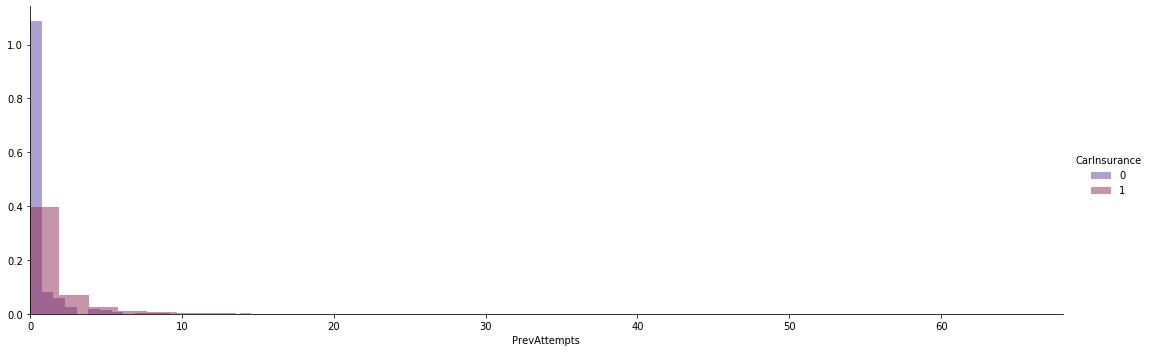

In [101]:
# lets take a closer look at the PrevAttempts variable

facet = sns.FacetGrid(Insurance_data, hue='CarInsurance', height=5 , aspect = 3 , palette='twilight')
facet.map(plt.hist,'PrevAttempts',bins=30,alpha=0.5,density=True)
facet.set(xlim=(0,Insurance_data.PrevAttempts.max()+10))
facet.add_legend()

In [102]:
### Date 05Oct2019

# lets checkout some categorical features

categorical_col = Insurance_data.select_dtypes(include = ['object']).columns

In [103]:
categorical_col

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd'],
      dtype='object')

In [104]:
# we will not use callstart and callend so removing them

categorical_col_plot = categorical_col[(categorical_col != 'CallStart') & (categorical_col !='CallEnd')] 

In [105]:
categorical_col_plot

Index(['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth',
       'Outcome'],
      dtype='object')

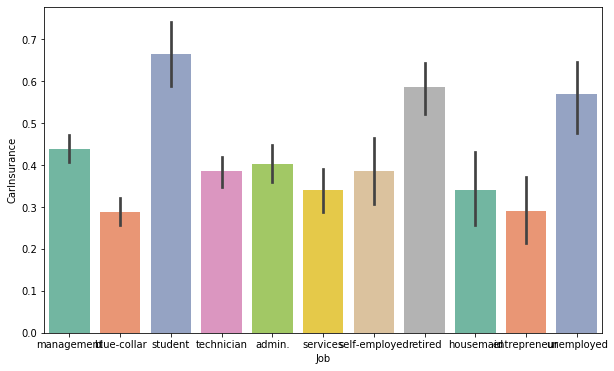

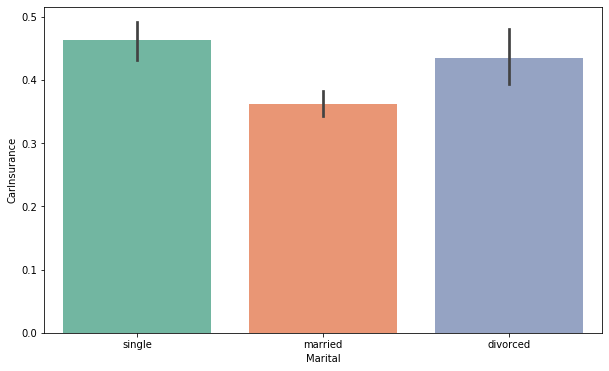

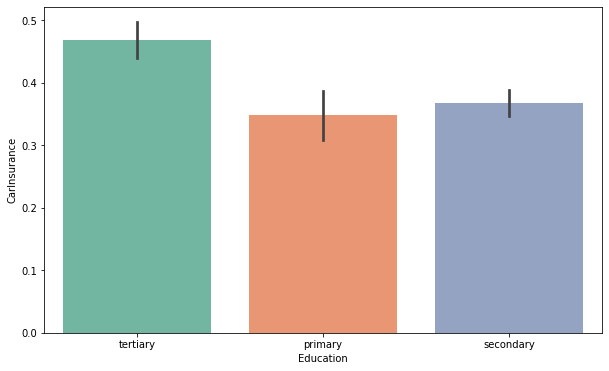

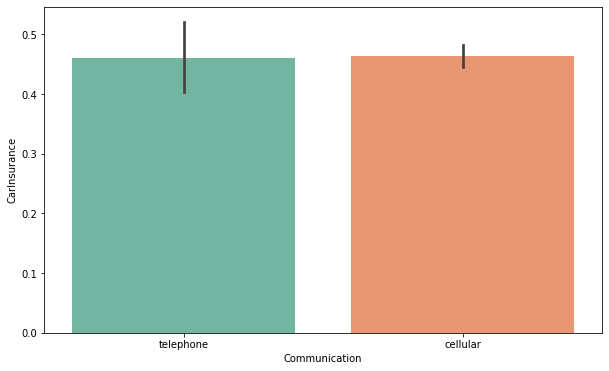

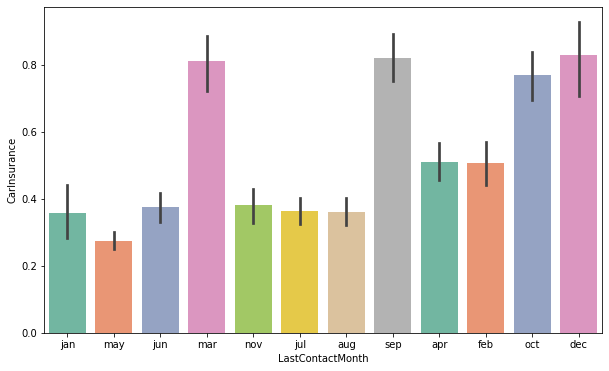

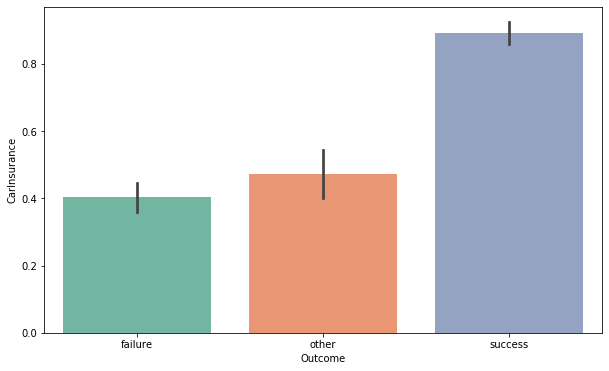

In [106]:
# this loop will print all the plot in one go

for feature in categorical_col_plot:
    plt.figure(figsize=(10,6))
    sns.barplot(feature,'CarInsurance',data=Insurance_data, palette='Set2')

In [107]:
# removing the outlier in balance

Insurance_data[Insurance_data.Balance >80000]

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [108]:
# Remove the above row

Insurance_data = Insurance_data.drop(Insurance_data[Insurance_data.index==1742].index)

In [109]:
#Handling missing data

#merge training and testing data inorder to handle all missing values at once

merge_data = pd.concat([Insurance_data,Insurance_test], keys=['train','test'])

In [110]:
# Removing carinsurance and id variables

merge_data.drop(['CarInsurance','Id'], axis =1 , inplace=True)

In [111]:
#getting shape of the mearged data

merge_data.shape

(4999, 17)

In [112]:
# now lets look at the missing data and their percentage

total_missing = merge_data.isnull().sum() # total missing data in every column

In [113]:
#calculate percentage

percentage = total_missing/merge_data.isnull().count()

In [114]:
# combine total and percentage value

NAs = pd.concat([total_missing,percentage],axis=1,keys=['Total','Percentage'])

In [115]:
# getting columns where there are missing values

NAs[NAs.Total > 0].sort_values(by='Total', ascending=False)

,Total,Percentage
Outcome,3798,0.759752
Communication,1123,0.224645
Education,216,0.043209
Job,24,0.004801


In [116]:
# Check total missing
total_missing

Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3798
CallStart              0
CallEnd                0
dtype: int64

In [117]:
# make copy of the data
merge_data_df = merge_data.copy()

In [118]:
# check for missing values in outcome
merge_data_df.groupby('Outcome')['Age'].nunique()

Outcome
failure    56
other      49
success    60
Name: Age, dtype: int64

In [119]:
# adding another category to data where dayspassed = -1
merge_data_df.loc[merge_data_df['DaysPassed']==-1,'Outcome'] = 'NoPrev'

In [120]:
merge_data_df.groupby('Outcome')['Age'].count()

Outcome
NoPrev     3798
failure     548
other       248
success     405
Name: Age, dtype: int64

In [121]:
# Fill missing values with none
merge_data_df.Communication.value_counts()

cellular     3529
telephone     347
Name: Communication, dtype: int64

In [122]:
merge_data_df['Communication'].fillna('None',inplace=True)

In [123]:
merge_data_df.Communication.value_counts()

cellular     3529
None         1123
telephone     347
Name: Communication, dtype: int64

In [124]:
# Fill missing values in education
merge_data_df.Education.value_counts()

secondary    2489
tertiary     1600
primary       694
Name: Education, dtype: int64

In [125]:
# Create job education level mode mapping

edu_mode=[]

In [126]:
# what are different job types

job_types = merge_data_df.Job.value_counts().index

In [127]:
# Checking which job is most frequent

merge_data_df['Job'].value_counts()

management       1113
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64

In [128]:
#

for job in job_types:
    mode = merge_data_df[merge_data_df.Job == job]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode, mode)
    
edu_map = pd.Series(edu_mode, index=merge_data_df.Job.value_counts().index)
    
edu_map

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
unemployed       secondary
student          secondary
entrepreneur      tertiary
housemaid          primary
dtype: object

In [129]:
# Replace the missing values
# apply the mapping to missing education obesrvations

for j in job_types:
    merge_data_df.loc[(merge_data_df['Education'].isnull()) & 
                      (merge_data_df['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

In [130]:
merge_data_df.loc[(merge_data_df['Job']=='management'),'Education'] # it shows index and education

train  0       tertiary
       2       tertiary
       4       tertiary
       7       tertiary
       15      tertiary
       17      tertiary
       22      tertiary
       25      tertiary
       26       primary
       33      tertiary
       40     secondary
       42      tertiary
       44      tertiary
       46     secondary
       58      tertiary
       60      tertiary
       65      tertiary
       67      tertiary
       69      tertiary
       77      tertiary
       78      tertiary
       90      tertiary
       95      tertiary
       96      tertiary
       100     tertiary
       104    secondary
       107     tertiary
       108     tertiary
       113     tertiary
       115     tertiary
                ...    
test   848     tertiary
       849     tertiary
       854     tertiary
       861     tertiary
       866     tertiary
       867     tertiary
       869     tertiary
       878     tertiary
       884     tertiary
       886     tertiary
       888     t

In [131]:
# for those who are not getting mapped we will create a new category
merge_data_df['Education'].fillna('None',inplace=True)


In [132]:
merge_data_df.Education.isnull().sum()

0

In [133]:
merge_data_df.Job.isnull().sum()

24

In [134]:
# Fill missing values in job with none

merge_data_df['Job'].fillna('None',inplace=True)

In [135]:
# double check if there are still some missing values
merge_data_df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
dtype: int64

In [136]:
# seperate numeric and categorical data
numeric_datatypes = merge_data.select_dtypes(include=[np.number]).columns.tolist()
numeric_datatypes

['Age',
 'Default',
 'Balance',
 'HHInsurance',
 'CarLoan',
 'LastContactDay',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts']

In [137]:
merge_data_df_num = merge_data_df[numeric_datatypes]

In [138]:
merge_data_df_num.head()

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0   32        0     1218            1        0              28   
      1   32        0     1156            1        0              26   
      2   29        0      637            1        0               3   
      3   25        0      373            1        0              11   
      4   30        0     2694            0        0               3   

         NoOfContacts  DaysPassed  PrevAttempts  
train 0             2          -1             0  
      1             5          -1             0  
      2             1         119             1  
      3             2          -1             0  
      4             1          -1             0

In [139]:
# Separate categorical data
categorical_datatypes = merge_data.select_dtypes(include=['object']).columns.tolist()

In [140]:
categorical_datatypes

['Job',
 'Marital',
 'Education',
 'Communication',
 'LastContactMonth',
 'Outcome',
 'CallStart',
 'CallEnd']

In [141]:
# we are removeing call start and call end

merge_data_df_cat = merge_data_df[['Job','Marital','Education','Communication','LastContactMonth','Outcome']]

In [142]:
merge_data_df_cat.head()

Job  Marital Education Communication LastContactMonth  \
train 0   management   single  tertiary     telephone              jan   
      1  blue-collar  married   primary          None              may   
      2   management   single  tertiary      cellular              jun   
      3      student   single   primary      cellular              may   
      4   management  married  tertiary      cellular              jun   

         Outcome  
train 0   NoPrev  
      1   NoPrev  
      2  failure  
      3   NoPrev  
      4   NoPrev

In [143]:
# Creating dummy variables

merge_data_df_cat = pd.get_dummies(merge_data_df_cat)

In [144]:
# Combine numeric and dummy variables

Insurance_data_dummy = pd.concat([merge_data_df_num,merge_data_df_cat],axis=1)

In [145]:
Insurance_data_dummy.head()

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0   32        0     1218            1        0              28   
      1   32        0     1156            1        0              26   
      2   29        0      637            1        0               3   
      3   25        0      373            1        0              11   
      4   30        0     2694            0        0               3   

         NoOfContacts  DaysPassed  PrevAttempts  Job_None  ...  \
train 0             2          -1             0         0  ...   
      1             5          -1             0         0  ...   
      2             1         119             1         0  ...   
      3             2          -1             0         0  ...   
      4             1          -1             0         0  ...   

         LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 0                     0                     0                     0   
      1                     0                     0                     1   
      2                     1                     0                     0   
      3                     0                     0                     1   
      4                     1                     0                     0   

         LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 0                     0                     0                     0   
      1                     0                     0                     0   
      2                     0                     0                     0   
      3                     0                     0                     0   
      4                     0                     0                     0   

         Outcome_NoPrev  Outcome_failure  Outcome_other  Outcome_success  
train 0               1                0              0                0  
      1               1                0              0                0  
      2               0                1              0                0  
      3               1                0              0                0  
      4               1                0              0                0  

[5 rows x 47 columns]

In [146]:
# Checking if there are mssing values before we run the model

Insurance_data_dummy.isnull().sum()


Age                        0
Default                    0
Balance                    0
HHInsurance                0
CarLoan                    0
LastContactDay             0
NoOfContacts               0
DaysPassed                 0
PrevAttempts               0
Job_None                   0
Job_admin.                 0
Job_blue-collar            0
Job_entrepreneur           0
Job_housemaid              0
Job_management             0
Job_retired                0
Job_self-employed          0
Job_services               0
Job_student                0
Job_technician             0
Job_unemployed             0
Marital_divorced           0
Marital_married            0
Marital_single             0
Education_None             0
Education_primary          0
Education_secondary        0
Education_tertiary         0
Communication_None         0
Communication_cellular     0
Communication_telephone    0
LastContactMonth_apr       0
LastContactMonth_aug       0
LastContactMonth_dec       0
LastContactMon

In [147]:
# split train and test

idx = pd.IndexSlice

In [148]:
train_df = Insurance_data_dummy.loc[idx[['train',],:]]

In [149]:
test_df = Insurance_data_dummy.loc[idx[['test',],:]]

In [150]:
# Create a label
train_label = Insurance_data['CarInsurance']
print(train_df.shape)
print(test_df.shape)

(3999, 47)
(1000, 47)


In [151]:
train_df.head()

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0   32        0     1218            1        0              28   
      1   32        0     1156            1        0              26   
      2   29        0      637            1        0               3   
      3   25        0      373            1        0              11   
      4   30        0     2694            0        0               3   

         NoOfContacts  DaysPassed  PrevAttempts  Job_None  ...  \
train 0             2          -1             0         0  ...   
      1             5          -1             0         0  ...   
      2             1         119             1         0  ...   
      3             2          -1             0         0  ...   
      4             1          -1             0         0  ...   

         LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
train 0                     0                     0                     0   
      1                     0                     0                     1   
      2                     1                     0                     0   
      3                     0                     0                     1   
      4                     1                     0                     0   

         LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
train 0                     0                     0                     0   
      1                     0                     0                     0   
      2                     0                     0                     0   
      3                     0                     0                     0   
      4                     0                     0                     0   

         Outcome_NoPrev  Outcome_failure  Outcome_other  Outcome_success  
train 0               1                0              0                0  
      1               1                0              0                0  
      2               0                1              0                0  
      3               1                0              0                0  
      4               1                0              0                0  

[5 rows x 47 columns]

In [152]:
test_df.head()

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
test 0   25        0        1            1        1              12   
     1   40        0        0            1        1              24   
     2   44        0    -1313            1        1              15   
     3   27        0     6279            1        0               9   
     4   53        0     7984            1        0               2   

        NoOfContacts  DaysPassed  PrevAttempts  Job_None  ...  \
test 0            12          -1             0         0  ...   
     1             1          -1             0         0  ...   
     2            10          -1             0         0  ...   
     3             1          -1             0         0  ...   
     4             1          -1             0         0  ...   

        LastContactMonth_jun  LastContactMonth_mar  LastContactMonth_may  \
test 0                     0                     0                     1   
     1                     0                     0                     0   
     2                     0                     0                     1   
     3                     0                     0                     0   
     4                     0                     0                     0   

        LastContactMonth_nov  LastContactMonth_oct  LastContactMonth_sep  \
test 0                     0                     0                     0   
     1                     0                     0                     0   
     2                     0                     0                     0   
     3                     1                     0                     0   
     4                     0                     0                     0   

        Outcome_NoPrev  Outcome_failure  Outcome_other  Outcome_success  
test 0               1                0              0                0  
     1               1                0              0                0  
     2               1                0              0                0  
     3               1                0              0                0  
     4               1                0              0                0  

[5 rows x 47 columns]

In [153]:
Insurance_data_dummy.iloc[14,:]

Age                          25
Default                       0
Balance                    2022
HHInsurance                   0
CarLoan                       0
LastContactDay               29
NoOfContacts                  8
DaysPassed                   97
PrevAttempts                 12
Job_None                      0
Job_admin.                    0
Job_blue-collar               0
Job_entrepreneur              0
Job_housemaid                 0
Job_management                0
Job_retired                   0
Job_self-employed             0
Job_services                  1
Job_student                   0
Job_technician                0
Job_unemployed                0
Marital_divorced              0
Marital_married               0
Marital_single                1
Education_None                0
Education_primary             0
Education_secondary           1
Education_tertiary            0
Communication_None            0
Communication_cellular        1
Communication_telephone       0
LastCont

In [154]:
Insurance_data_dummy

Age  Default  Balance  HHInsurance  CarLoan  LastContactDay  \
train 0     32        0     1218            1        0              28   
      1     32        0     1156            1        0              26   
      2     29        0      637            1        0               3   
      3     25        0      373            1        0              11   
      4     30        0     2694            0        0               3   
      5     32        0     1625            0        0              22   
      6     37        0     1000            1        0              17   
      7     35        0      538            1        0              12   
      8     30        0      187            1        0              18   
      9     30        0        3            1        1              12   
      10    27        0        0            0        0               1   
      11    53        1     -462            0        0              29   
      12    44        0     2776            1        0              27   
      13    38        0     2674            1        0              19   
      14    25        0     2022            0        0              29   
      15    61        0        2            0        0              12   
      16    34        0       69            1        0               6   
      17    46        0     7331            0        0              11   
      18    49        0     2039            1        0               6   
      19    50        0       82            0        0               5   
      20    57        0      773            1        1              18   
      21    80        0     8304            0        0               8   
      22    31        0        0            0        0              21   
      23    63        0     2896            0        0               1   
      24    60        0      824            1        0               9   
      25    29        0      900            0        0              17   
      26    54        0     3859            0        1              20   
      27    45        0        0            0        0              21   
      28    34        0      -62            1        0              16   
      29    42        0      832            0        0              20   
...        ...      ...      ...          ...      ...             ...   
test  970   56        0      340            1        0              21   
      971   38        0      890            1        0               5   
      972   62        0     2021            0        0              26   
      973   83        0     5944            0        0              30   
      974   33        0      882            1        0               6   
      975   50        0       78            0        0               4   
      976   53        0      230            1        0               4   
      977   28        0     3285            1        0               9   
      978   30        0      377            1        0               4   
      979   51        0      726            1        0              27   
      980   55        0      184            0        0              13   
      981   53        0     9146            0        0              13   
      982   31        0     -475            1        0              12   
      983   40        0      254            1        0               7   
      984   35        0      568            1        0              14   
      985   25        0     2975            0        0               2   
      986   53        0      357            0        0              18   
      987   33        0        0            0        0              30   
      988   41        0     -206            0        0              20   
      989   37        0     1543            1        0              22   
      990   35        0     1254            1        1               1   
      991   32        0      366            0        0              14   
      992   45 

In [155]:
# split the data into train and test
# spliting the data into validation set

from sklearn.model_selection import train_test_split

In [156]:
x_train, x_test, y_train, y_test = train_test_split(train_df,train_label, train_size=0.7, random_state=100)

In [157]:
# performing logistic regression
from sklearn.linear_model import LogisticRegression

In [158]:
# create logistic regression object
lr = LogisticRegression()

In [159]:
# fit the model to the training data
lr.fit(x_train,y_train)

C:\Users\Smart User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [160]:
# making predictions using the model

y_pred = lr.predict(x_test)

In [161]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [162]:
# generate model performance metrics

from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score,roc_auc_score

In [163]:
accuracy = accuracy_score(y_test,y_pred)

In [164]:
f1=f1_score(y_test,y_pred)

In [165]:
precision = precision_score(y_test,y_pred)

In [166]:
recall = recall_score(y_test,y_pred)

In [167]:
roc_auc = roc_auc_score(y_test,y_pred)

In [168]:
print('Accuracy is :', accuracy)
print('F1 Score is :', f1)
print('Precision is :',precision)
print('Recall is :',recall)
print('Area under the curve is :', roc_auc)

Accuracy is : 0.7191666666666666
F1 Score is : 0.5761006289308176
Precision is : 0.7111801242236024
Recall is : 0.48414376321353064
Area under the curve is : 0.6781103960496814


#Accurance - 72% of the time our model is predicting corretly
#Precision - 72% of the people who buying insurance correctly
#Recall - out of total number of predictions our model are able to capture 49% correctly  who actually bought insurance

                                           Actual
                                     |  +     |    -
                                 ----|--------|----------
                                  +  | TP     |   FP
                       Predicted ----|--------|----------
                                  -  | FN     |   TN
                                 ----|--------|---------- 


# Home work

### apply polynomials on numeric veriables
### experiments with logistic object arguments
### create a transform variable from calll start and call end
    ### we have to find out the difference between call end and call start and save the values of same in new column
### standardise some the variables
### check for outliers with the help of boxplot or standard deviation
### check for multicolinearity 
### check for colinearity betn dependent and independent variable
    ### use one way annova for categorical and numerical data
    ### use two way annova for categorical and categorical data


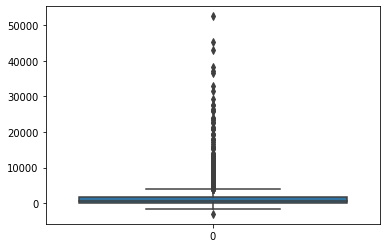

In [172]:
import seaborn as sns
sns.boxplot(data=Insurance_data['Balance'])

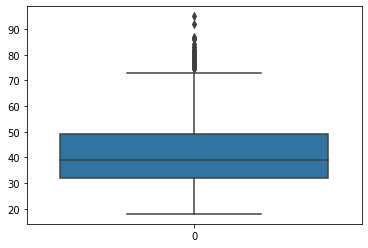

In [173]:
import seaborn as sns
sns.boxplot(data=Insurance_data['Age'])